# Loading dependencies + data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import scipy.stats

import figs

import sys
sys.path.append('..')
import lb

%load_ext autoreload
%autoreload 2


In [2]:
figs.set_mpl_style()


In [3]:
Dall = lb.exp.Data.load('0.4')
D = Dall.qualified()

# We use this for analyzing effect of programming experience, and for demographics reporting.
Dcompleted = Dall.filtered_exp(Dall.workers_task_completed())
# This only includes participants with no programming experience.
Dstrict = Dall.qualified(strict=True)

Large difference 83ms between duration 26914ms and end-start difference 26831ms for pid=md5:8c43bec3733bb9976c197bff02dbf4e2 trial=3
Large difference 155ms between duration 6858ms and end-start difference 6703ms for pid=md5:fce1be10fd7e4f749e9b5f731056d7f3 trial=4
Modal row count 34. # matching 193 / 235
# with no programming 171 / 235
# valid workers 171 / 235
Large difference 83ms between duration 26914ms and end-start difference 26831ms for pid=md5:8c43bec3733bb9976c197bff02dbf4e2 trial=3
Large difference 155ms between duration 6858ms and end-start difference 6703ms for pid=md5:fce1be10fd7e4f749e9b5f731056d7f3 trial=4
Modal row count 34. # matching 193 / 235
# with no programming 125 / 235
# valid workers 125 / 235


# Export data

In [4]:
pd.DataFrame([
    dict(
        participant_idx=idx,
        mdp_idx=figs.mdp_names.index(tr.mdp_name),
        skipped=tr.skipped,
        elapsed_minutes=tr.elapsed_minutes,
        program_evaluations=len(tr.editor_runs()),
        program='' if tr.skipped else lb.exp.ProgramSerDe.serialize(lb.tools.readable_repr(tr.program)),
        preprocessed_program='' if tr.skipped else lb.exp.ProgramSerDe.serialize(lb.tools.readable_repr(tr.canonical_program)),
        programming_exp=p.programming_experience()['programming-exp'],
        programming_game_exp=p.programming_experience()['programming-game-exp'],
    )
    for idx, p in enumerate(D.participants)
    for tr in p.task_rows()
]).to_csv('../data/programs.csv', index=False)

# Descriptive: general

In [5]:
Dall.report_programming_experience()


Large difference 83ms between duration 26914ms and end-start difference 26831ms for pid=md5:8c43bec3733bb9976c197bff02dbf4e2 trial=3
Large difference 155ms between duration 6858ms and end-start difference 6703ms for pid=md5:fce1be10fd7e4f749e9b5f731056d7f3 trial=4

193 workers completed task

Have you played Lightbot or another similar programming game before?
No | 189/193 98%
Yes | 4/193 2%

How much experience do you have with computer programming?
Between 1 and 3 college courses (or equivalent) | 46/193 24%
More than 3 college courses (or equivalent) | 22/193 11%
None | 125/193 65%



In [6]:
elapsed = [
    p.elapsed_minutes()
    for p in Dcompleted.participants
]
figs.meansd(elapsed, range=True)

$M=59.55$ $SD=25.63$, range: 17.20--125.56


# Enumerating programs

In [7]:
if 'dc' in locals():
    del dc
    import gc
    gc.collect()

dc = lb.fitting.default_program_enumeration(D)

Loading from cached file took 44.82 seconds. Last modified 2024-07-01T02:15:22.118727+00:00 (36 days, 13:47:42.680437 ago)


In [8]:
dc.show()


--------------------
('cgcMaps', 14) 39650 elapsed {'enum:trace': '0.117s', 'enum:program': '0.918s', 'enum:program_count_matrix': '1.529s'}
Behavior #participants=166 trace range=12-40 perc(50=14.00, 75=15.75, 95=18.75, 99=22.70)
TraceSet #1124 #programs=39650 trace range 12-20 iters=10400 non-monotonic=0
trace (full) missing total=4/166 (2.41%) unique=4/31 (12.90%) avg count per unique=4/4=1.00 {'BDCAEBDCAEBBECCCECCECA', 'BBADDBECADDCDBBDCDBECA', 'DCCEBBAECBACEECEBBECECCCEBCCEBBECCEBBECA', 'EBDCDBCAEBDCAEBECCBECECA'}
trace (by 2+) missing total=0/150 (0.00%) unique=0/15 (0.00%)  set()
program (full) missing total=15/166 (9.04%) unique=15/69 (21.74%) avg count per unique=15/15=1.00
program (by 2+) missing total=0/121 (0.00%) unique=0/24 (0.00%) 
Participant % with trace within max length 97.59% (assuming astar with include_equal_score)

--------------------
('cgcMaps', 3) 6742493 elapsed {'enum:trace': '2.048s', 'enum:program': '196.208s', 'enum:program_count_matrix': '393.378s'}
Beha

# Load models
Only used in a few places

In [9]:
fit_models = lb.fitting.analysis(dc)

Loading from cached file took 0.08 seconds. Last modified 2024-07-01T12:19:55.389620+00:00 (36 days, 3:44:01.456608 ago)
score_reuse_and_reward FitResult(range=[12825.23, 14569.54], success=51/51, reach_minima=49/51, best_params=Args(b=2.5249118142314417, prior_beta=0.3785865069958296, p_normal=0.9067700021498019, step_count_coef=0.5160047821587829), match_best_params=47/51, elapsed_sec_range=[1005.68, 3814.91])
score_reuse FitResult(range=[13482.30, 14161.19], success=51/51, reach_minima=45/51, best_params=Args(b=4.229798418431225, prior_beta=0.48215058508394065, p_normal=0.876270926517888), match_best_params=40/51, elapsed_sec_range=[331.65, 1827.14])
score_mdl_and_reward FitResult(range=[15267.23, 15267.23], success=51/51, reach_minima=51/51, best_params=Args(mdl_beta=0.5252790119387051, step_count_coef=0.8516355052577316), match_best_params=51/51, elapsed_sec_range=[14.43, 35.23])
score_mdl FitResult(range=[16787.27, 16787.27], success=51/51, reach_minima=51/51, best_params=Args(md

# Descriptive: Most common programs

In [10]:
for canonical in [False, True]:
    print(f'{canonical=}')
    programs_by_count = D.programs_by_count(canonical=canonical)

    ct = dict(sum=0, total=0)
    ct_2plus = dict(sum=0, total=0)

    for row in dc.d:
        for p, ct_ in programs_by_count[row.mdp_name].items():
            found = p in row.ts.program_set
            n = ct_
            if found:
                ct['sum'] += n
                if ct_ >= 2: ct_2plus['sum'] += n
            ct['total'] += n
            if ct_ >= 2: ct_2plus['total'] += n

    print(f"Percentage of participant programs found: {ct['sum'] / ct['total'] * 100:.0f}")
    print(f"Percentage of participant programs found (2+): {ct_2plus['sum'] / ct_2plus['total'] * 100:.0f}")


canonical=False
Percentage of participant programs found: 41
Percentage of participant programs found (2+): 82
canonical=True
Percentage of participant programs found: 78
Percentage of participant programs found (2+): 94


# Are common programs easier to write?

--------------------------------------------------------------------------------
Default inclusion critieria
----------------------------------------
--------------------


R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘lmerTest’


R[write to console]: The following object is masked from ‘package:lme4’:

    lmer


R[write to console]: The following object is masked from ‘package:stats’:

    step




Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: update(fml, . ~ . + prog_count)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  2600.8   2638.8  -1293.4   2586.8     1661 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1993 -0.6338 -0.0560  0.5200  4.5994 

Random effects:
 Groups   Name        Variance Std.Dev.
 pid      (Intercept) 0.22718  0.4766  
 mdp_name (Intercept) 0.08795  0.2966  
 Residual             0.20982  0.4581  
Number of obs: 1668, groups:  pid, 171; mdp_name, 10

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  4.774e+00  1.408e-01  4.409e+01  33.917  < 2e-16 ***
cost         1.040e-02  4.579e-03  1.444e+03   2.270   0.0233 *  
hier_len     2.147e-02  4.089e-03  1.664e+03   5.252  1.7e-07 ***
prog_count  -8.098e-03  9.594e-04  1.542e+03  -8.441  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correl

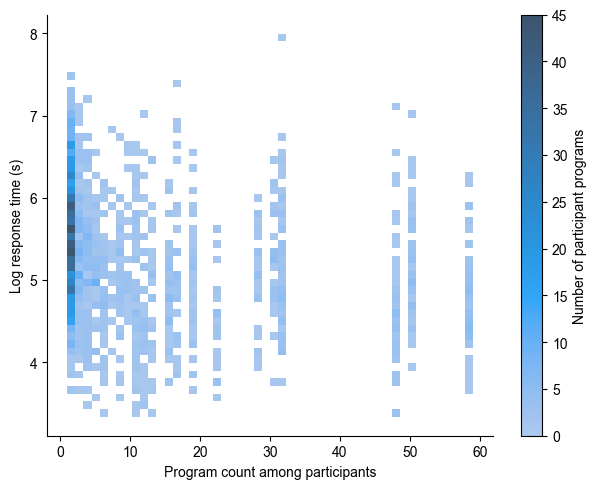

anova $\chi^2(1)=69.73$, $p < .001$
--------------------
Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: update(fml, . ~ . + prog_count)
   Data: df

     AIC      BIC   logLik deviance df.resid 
 11323.3  11361.2  -5654.7  11309.3     1661 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2484 -0.5322 -0.1173  0.3148  9.7397 

Random effects:
 Groups   Name        Variance Std.Dev.
 pid      (Intercept) 29.947   5.472   
 mdp_name (Intercept)  1.183   1.087   
 Residual             41.213   6.420   
Number of obs: 1668, groups:  pid, 171; mdp_name, 10

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   -0.22232    1.25149   71.45893  -0.178     0.86    
cost           0.23241    0.05675  245.27940   4.095 5.73e-05 ***
hier_len       0.30274    0.05533 1567.03844   5.471 5.20e-08 ***
prog_count    -0.05251    0.01286  760.20460  -4.085 4.88e-05 ***
---
Signif. codes

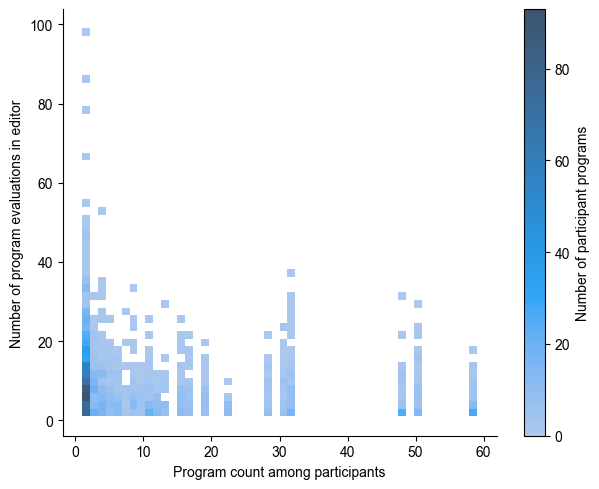

anova $\chi^2(1)=16.48$, $p < .001$
--------------------------------------------------------------------------------
No programming experience
----------------------------------------
--------------------
Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: update(fml, . ~ . + prog_count)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  1874.3   1910.0   -930.1   1860.3     1210 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2312 -0.6092 -0.0658  0.5160  3.9929 

Random effects:
 Groups   Name        Variance Std.Dev.
 pid      (Intercept) 0.23471  0.4845  
 mdp_name (Intercept) 0.08527  0.2920  
 Residual             0.20253  0.4500  
Number of obs: 1217, groups:  pid, 125; mdp_name, 10

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  4.691e+00  1.668e-01  7.083e+01  28.115  < 2e-16 ***
cost         1.137e-02  7.340e-03  7.977e+02   1.548    0.122    
h

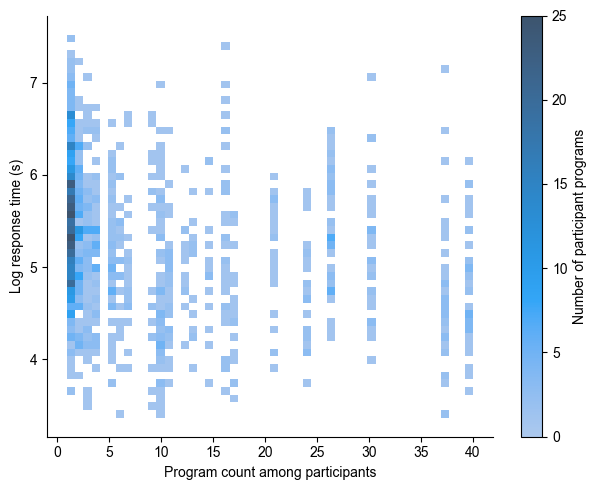

anova $\chi^2(1)=43.77$, $p < .001$
--------------------
Linear mixed model fit by maximum likelihood . t-tests use Satterthwaite's
  method [lmerModLmerTest]
Formula: update(fml, . ~ . + prog_count)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  8248.6   8284.3  -4117.3   8234.6     1210 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8332 -0.5043 -0.1162  0.2776  9.7579 

Random effects:
 Groups   Name        Variance Std.Dev.
 pid      (Intercept) 29.397   5.422   
 mdp_name (Intercept)  1.163   1.079   
 Residual             40.582   6.370   
Number of obs: 1217, groups:  pid, 125; mdp_name, 10

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)   -1.95981    1.47585   40.84678  -1.328 0.191577    
cost           0.28464    0.08228   91.29121   3.459 0.000825 ***
hier_len       0.31741    0.06826 1215.34685   4.650 3.68e-06 ***
prog_count    -0.05368    0.02126  607.31266  -2.525 0.011838 *  
---
Signif. codes

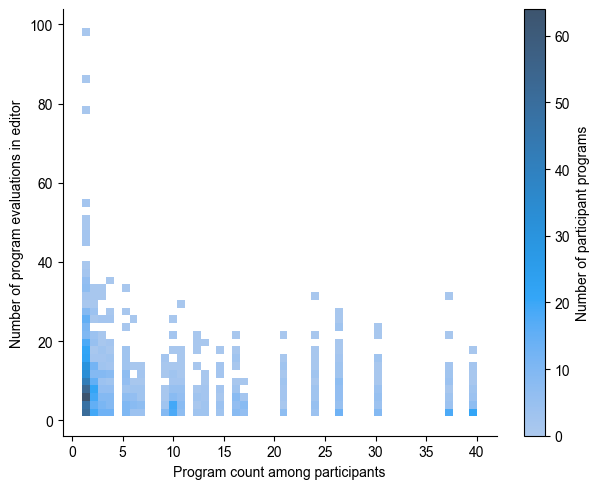

anova $\chi^2(1)=6.34$, $p = .012$


In [11]:
def program_ease(D, *, tag=''):
    if tag:
        tag = f'-{tag}'

    rows = []
    cts = D.programs_by_count()
    for participant in D.participants:
        for tr in participant.task_rows():
            if tr.skipped:
                continue
            rows.append(dict(
                pid=participant.worker,
                mdp_name='-'.join(map(str, tr.mdp_name)),
                log_elapsed_seconds=np.log(tr.elapsed_minutes * 60),
                runs=len(tr.editor_runs()),
                prog_count=cts[tr.mdp_name][tr.canonical_program],
                cost=lb.ProgramStepCounter.count(tr.mdp, tr.program).step,
                hier_len=lb.hier_len(tr.program),
            ))
    rows = pd.DataFrame(rows)

    label = {
        'prog_count': 'Program count among participants',
        'log_elapsed_seconds': 'Log response time (s)',
        'runs': 'Number of program evaluations in editor',
    }

    for x, y in [
        ('prog_count', 'log_elapsed_seconds'),
        ('prog_count', 'runs'),
    ]:
        print('-' * 20)
        import journal.figs as figs
        model_null, model = figs.runr(f'''
        library(lme4)
        library(lmerTest)
        fml = {y} ~ (1|pid) + (1|mdp_name) + cost + hier_len
        null = lmer(fml, data=df, REML=FALSE)
        m = lmer(update(fml, . ~ . + {x}), data=df, REML=FALSE)
        show(summary(m))
        show(anova(null, m))
        list(null, m)
        ''', df=figs.convert_df_to_rdf(rows))
        sns.displot(x=x, y=y, data=rows, cbar=True, cbar_kws=dict(label='Number of participant programs'), bins=50, aspect=1.25)
        plt.xlabel(label[x])
        plt.ylabel(label[y])
        figs.save(f'program-ease-{x}-{y}{tag}.pdf')
        plt.show()
        figs.anova(model=model, null=model_null)

print('-'*80)
print('Default inclusion critieria')
print('-'*40)
program_ease(D)
print('-'*80)
print('No programming experience')
print('-'*40)
program_ease(Dstrict, tag='no_prog_exp')

# Descriptive: Effect of programming experience

Large difference 83ms between duration 26914ms and end-start difference 26831ms for pid=md5:8c43bec3733bb9976c197bff02dbf4e2 trial=3
Large difference 155ms between duration 6858ms and end-start difference 6703ms for pid=md5:fce1be10fd7e4f749e9b5f731056d7f3 trial=4


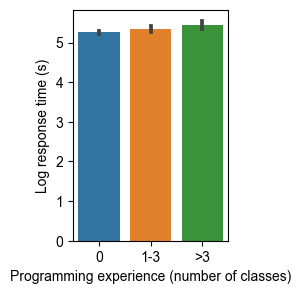

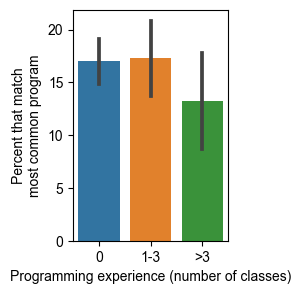

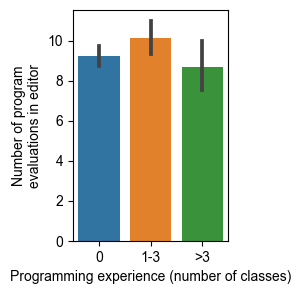

In [12]:
# To include 3+ class programmers, we refilter, including all workers that completed the task
Dcompleted = Dall.filtered_exp(Dall.workers_task_completed())

program_cts = Dcompleted.programs_by_count()
most_common_program = {}
for mdp, cts in program_cts.items():
    max_ct = max(cts.values())
    max_progs = [prog for prog, ct in cts.items() if ct == max_ct]
    if len(max_progs) != 1:
        print(mdp, max_progs, max_ct)
    most_common_program[mdp] = set(max_progs)
data = []
for p in Dcompleted.participants:
    for tr in p.completed_task_rows():
        data.append(dict(
            pid=p.worker,
            prog_exp={
                'None': '0',
                'Between 1 and 3 college courses (or equivalent)': '1-3',
                'More than 3 college courses (or equivalent)': '>3',
            }[p.programming_experience()['programming-exp']],
            log_elapsed_seconds=np.log(tr.elapsed_minutes * 60),
            produced_most_common=100*(tr.canonical_program in most_common_program[tr.mdp_name]),
            number_exec=len(tr.editor_runs()),
        ))
data = pd.DataFrame(data)

pe_order = ['0', '1-3', '>3']

for y in ['log_elapsed_seconds', 'produced_most_common', 'number_exec']:
    plt.subplots(figsize=(2, 3))
    sns.barplot(x='prog_exp', y=y, data=data, order=pe_order, n_boot=10000)
    plt.ylabel(dict(
        log_elapsed_seconds="Log response time (s)",
        produced_most_common="Percent that match\nmost common program",
        number_exec="Number of program\nevaluations in editor",
    )[y])
    plt.xlabel('Programming experience (number of classes)')
    figs.save(f'prog_exp_predict_{y}.pdf')

In [13]:
for col in ['log_elapsed_seconds', 'number_exec', 'produced_most_common']:
    print('-'*30)
    m, null = figs.runr(f'''
    library(lme4)
    null = lmer(
        {col} ~ 1 + (1|pid), data=df, REML=FALSE
        # control=lmerControl(optimizer = "Nelder_Mead", optCtrl = list(maxfun = 10000))
    )
    m = update(null, . ~ . + prog_exp)
    show(anova(m, null))
    list(m, null)
    ''', df=figs.convert_df_to_rdf(data))
    print('-'*10)
    figs.anova(model=m, null=null)

------------------------------
Data: df
Models:
null: log_elapsed_seconds ~ 1 + (1 | pid)
m: log_elapsed_seconds ~ (1 | pid) + prog_exp
     npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)
null    3 3923.2 3939.8 -1958.6   3917.2                     
m       5 3924.1 3951.8 -1957.1   3914.1 3.0424  2     0.2185
----------
anova $\chi^2(2)=3.04$, $p = .218$
------------------------------
Data: df
Models:
null: number_exec ~ 1 + (1 | pid)
m: number_exec ~ (1 | pid) + prog_exp
     npar   AIC   BIC  logLik deviance  Chisq Df Pr(>Chisq)
null    3 13216 13233 -6605.0    13210                     
m       5 13219 13247 -6604.5    13209 0.9394  2     0.6252
----------
anova $\chi^2(2)=0.94$, $p = .625$
------------------------------


R[write to console]: boundary (singular) fit: see help('isSingular')

R[write to console]: boundary (singular) fit: see help('isSingular')



Data: df
Models:
null: produced_most_common ~ 1 + (1 | pid)
m: produced_most_common ~ (1 | pid) + prog_exp
     npar   AIC   BIC  logLik deviance Chisq Df Pr(>Chisq)
null    3 19014 19030 -9503.7    19008                    
m       5 19015 19043 -9502.7    19005 2.083  2     0.3529
----------
anova $\chi^2(2)=2.08$, $p = .353$


# Individual differences in program length / SR creation


sr_count
$\rho=-0.79$, $p < .001$, $N=171$


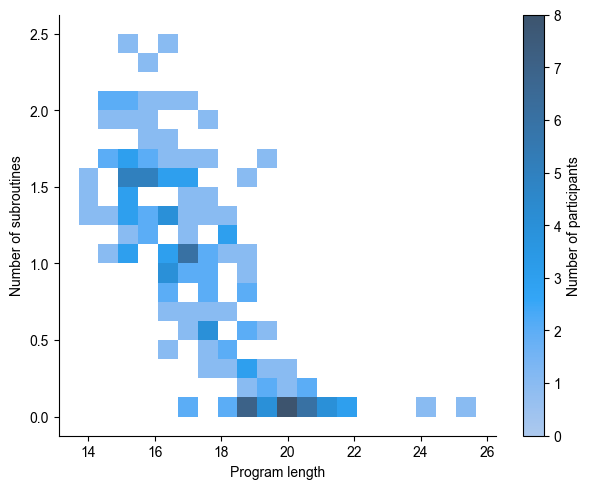

sr_len
$\rho=-0.83$, $p < .001$, $N=171$


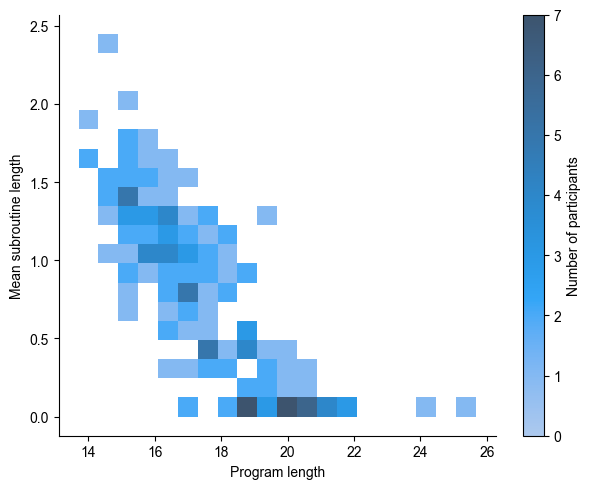

In [14]:
df = []
for p in D.participants:
    progs = [tr.canonical_program for tr in p.completed_task_rows()]
    df.append(dict(
        sr_count=np.mean([lb.exp.subroutine_count(p) for p in progs]),
        sr_len=np.mean([np.mean([len(sr) for sr in p.subroutines]) for p in progs]),
        program_length=np.mean([lb.hier_len(p) for p in progs]),
    ))
df = pd.DataFrame(df)

for y in ['sr_count', 'sr_len']:
    x = 'program_length'
    print(y)
    figs.spearmanr_permutation_test(df[x], df[y], report=True)
    sns.displot(
        x=x, y=y, data=df,
        cbar=True,
        cbar_kws=dict(label='Number of participants'),
        bins=20,
        aspect=1.25,
    )
    plt.ylabel(dict(
        sr_count='Number of subroutines',
        sr_len='Mean subroutine length',
        sr_len_summed='Total length of all subroutines',
    )[y])
    plt.xlabel('Program length')
    figs.save(f'indiv_diff-{x}-{y}.pdf')
    plt.show()

# Examining solution variance

## Report descriptive measures of difficulty/variance

In [15]:
skipped_by_mdp = collections.Counter()
total_by_mdp = collections.Counter()
rows = []
for participant in D.participants:
    for tr in participant.task_rows():
        if tr.skipped:
            skipped_by_mdp[tr.mdp_name] += 1
            continue
        total_by_mdp[tr.mdp_name] += 1
        rows.append(dict(
            mdp_name=tr.mdp_name,
            log_elapsed_seconds=np.log(tr.elapsed_minutes * 60),
            runs=len(tr.editor_runs()),
        ))
grouped = {row.Index: row for row in pd.DataFrame(rows).groupby('mdp_name').mean().itertuples()}

cts = D.programs_by_count()
df_task_desc = []
for mdp_label, mdp_name in figs.mdp_labels_and_names:
    progs = cts[mdp_name]
    progs_np = np.array(list(progs.values()))
    mdp = lb.exp.mdp_from_name(mdp_name)

    df_task_desc.append(dict(
        mdp_name=mdp_name,
        mdp_label=mdp_label,
        total_lights=mdp.total_lights,
        # Measures of solution variance
        mode=max(progs.values()),
        unique_ct=len(progs),
        # Measures of difficulty
        log_elapsed_seconds=grouped[mdp_name].log_elapsed_seconds,
        runs=grouped[mdp_name].runs,
        skipped=skipped_by_mdp[mdp_name],
        total=total_by_mdp[mdp_name],
    ))
df_task_desc = pd.DataFrame(df_task_desc)

print(figs.pd_to_latex(pd.DataFrame({
    figs.makecell(k, align='l') if '\n' in k else k: v
    for k, v in {
        'Task': df_task_desc.mdp_label,
        'Light count': df_task_desc.total_lights,
        'Mean log response\ntime (seconds)': df_task_desc.log_elapsed_seconds.apply(lambda s: f'{s:.2f}'),
        'Mean program\nevaluations': df_task_desc.runs.apply(lambda s: f'{s:.2f}'),
        'Times skipped': df_task_desc.skipped,
        'Number of\nunique solutions': df_task_desc.unique_ct,
        'Number of participants\nwith most common program': [
            figs.makecell(f"{row.mode}\n({100*row.mode/row.total:.0f}\\%)", align='l')
            for row in df_task_desc.itertuples()],
    }.items()
}).set_index('Task').T.reset_index(), kwargs=dict(), midrule_hack=True).replace('index', 'Task'))

\begin{tabular}{lllllllllll}
\toprule
                                                                    Task &                          a &                          b &                          c &                          d &                          e &                        f &                          g &                          h &                          i &                         j \\
\midrule
                                                              Light count &                          3 &                          8 &                          3 &                          6 &                          3 &                        7 &                          8 &                          6 &                          4 &                         3 \\
               \midrule \makecell[l]{Mean log response \\ time (seconds)} &                       5.69 &                       5.71 &                       4.87 &                       5.41 &                       5.27 &      

## Plotting difficulty and variance

----------
'No. with\nmost common program' ~ 'Log response time (seconds)'
$\rho=-0.20$, $p = .578$, $N=10$
----------
'No. of\nunique solutions' ~ 'Log response time (seconds)'
$\rho=0.73$, $p = .02$, $N=10$
----------
'No. with\nmost common program' ~ 'No. of program evaluations'
$\rho=-0.29$, $p = .411$, $N=10$
----------
'No. of\nunique solutions' ~ 'No. of program evaluations'
$\rho=0.78$, $p = .012$, $N=10$


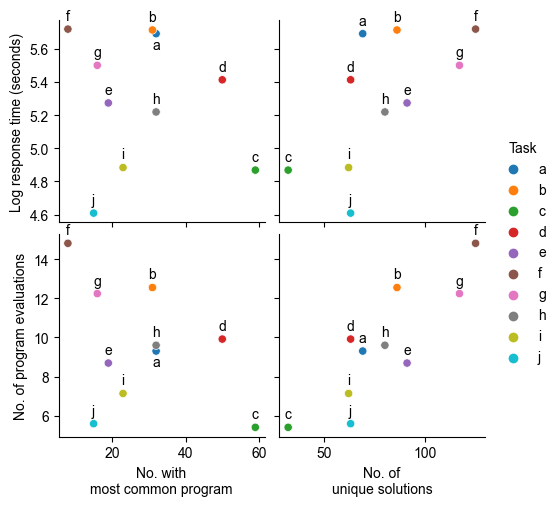

In [16]:
def task_pairplot(*, x_vars, y_vars, data, hue, correlate=False, offset_dict={}):
    g = sns.pairplot(
        data=data,
        x_vars=x_vars,
        y_vars=y_vars,
        hue=hue,
        palette='tab10',
    )

    for y_var, axes in zip(y_vars, g.axes):
        for x_var, ax in zip(x_vars, axes):
            # add labels
            # make it extent-relative
            ylim = ax.get_ylim()
            y_extent = ylim[1] - ylim[0]
            xlim = ax.get_xlim()
            x_extent = xlim[1] - xlim[0]
            for _, row in data.iterrows():
                dx, dy = offset_dict.get((x_var, y_var, row[hue]), (0, .03))
                ax.text(row[x_var] + dx * x_extent, row[y_var] + dy * y_extent, row[hue], ha='center', va='bottom')

            # run correlation
            if correlate:
                print('-'*10)
                print(repr(x_var), '~', repr(y_var))
                figs.spearmanr_permutation_test(data[x_var], data[y_var], report=True)

col2names = dict(
    mode='No. with\nmost common program',
    unique_ct='No. of\nunique solutions',
    log_elapsed_seconds='Log response time (seconds)',
    runs='No. of program evaluations',
    mdp_label='Task',
)
task_pairplot(
    x_vars=[col2names[k] for k in ['mode', 'unique_ct']],
    y_vars=[col2names[k] for k in ['log_elapsed_seconds', 'runs']],
    hue=col2names['mdp_label'],
    data=df_task_desc.rename(columns=col2names),
    correlate=True,
    offset_dict={
        (col2names['mode'], col2names[k], 'a'): (0, -.09)
        for k in ['runs', 'log_elapsed_seconds']
    },
)
figs.save('solvar_taskperf.pdf')

## What are distributions of programs?

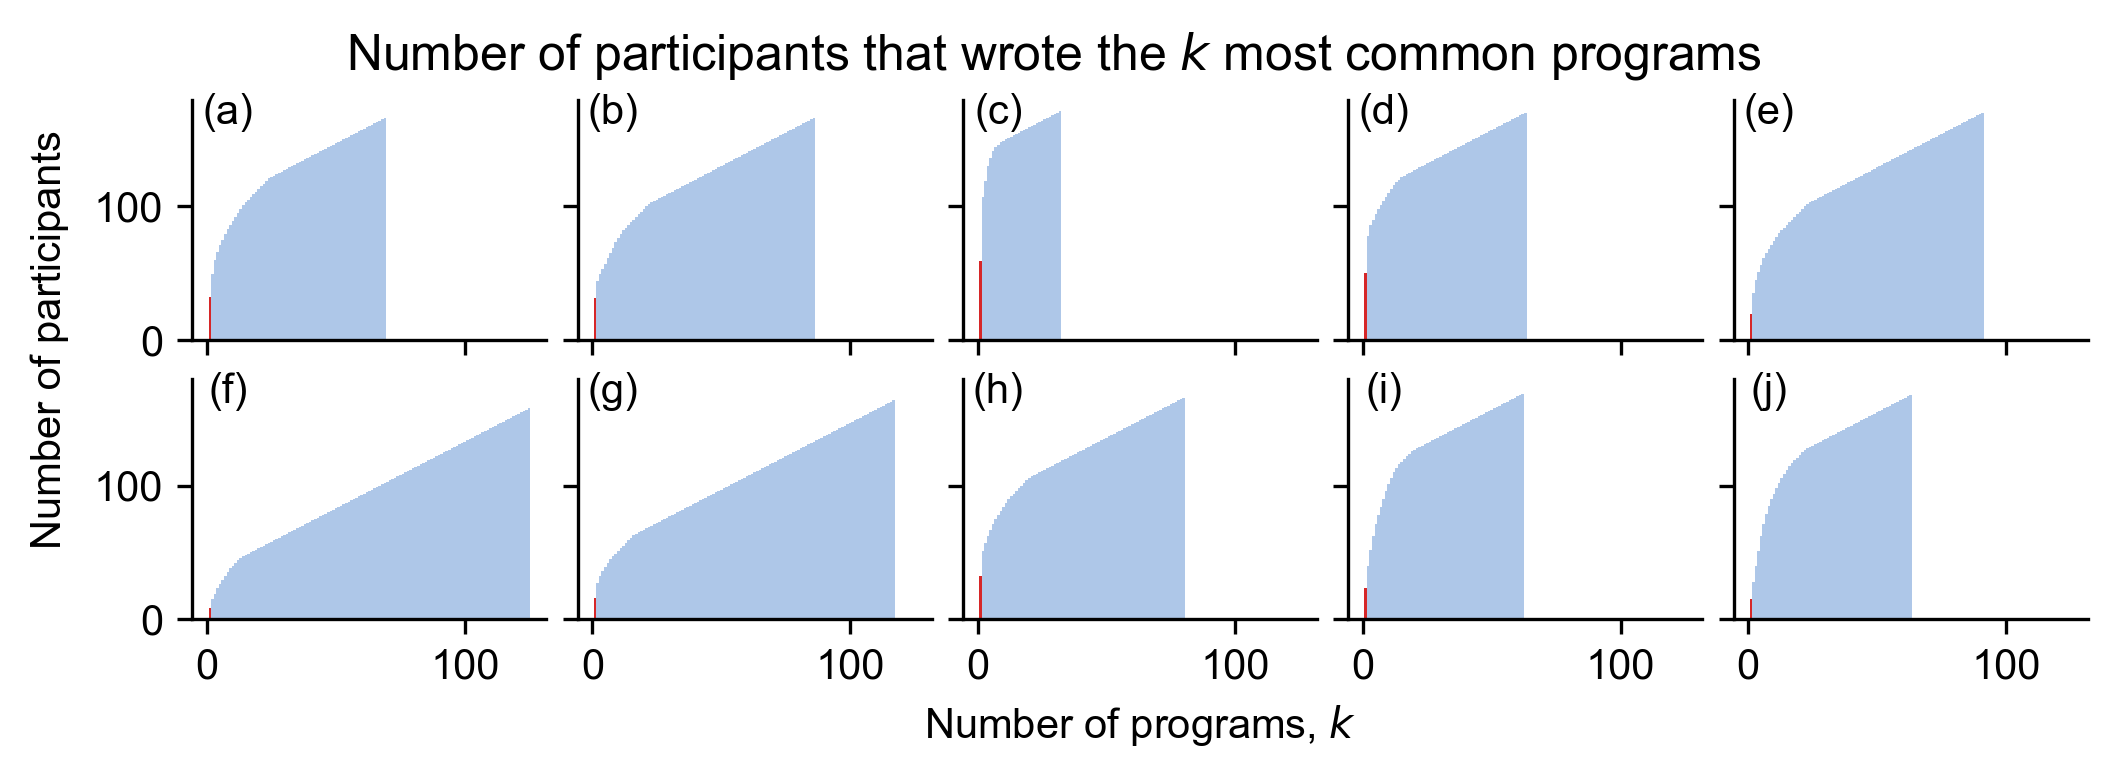

In [17]:
cts = D.programs_by_count()

df = pd.DataFrame([
    dict(
        mdp_label=mdp_label,
        ct=ct,
        idx=idx,
    )
    for mdp_label, mdp_name in figs.mdp_labels_and_names
    for idx, (p, ct) in enumerate(sorted(cts[mdp_name].items(), key=lambda pair: -pair[-1]))
])

g = sns.FacetGrid(
    data=df,
    col='mdp_label',
    col_wrap=5,
    sharex=True, sharey=True)
tab10 = plt.get_cmap('tab10').colors
tab20 = plt.get_cmap('tab20').colors
def fn(*args, data, **kwargs):
    assert data.idx.values.tolist() == list(range(len(data)))
    c = [tab10[3]] + [tab20[1]] * (len(data)-1)
    plt.bar(np.arange(len(data))+1, data.ct.cumsum(), width=1, color=c)
    label = data.mdp_label.iloc[0]
    t = plt.text(0.10, 0.95, f'({label})', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    t.set_in_layout(False)

g.map_dataframe(fn)

g.set_titles('')

g.set_xlabels('')
g.axes[7].set_xlabel('Number of programs, $k$')

g.axes[0].set_ylabel('Number of participants')
g.axes[0].yaxis.set_label_coords(-.35, 0)

plt.suptitle('Number of participants that wrote the $k$ most common programs')

f = plt.gcf()
f.set_dpi(300)
f.set_size_inches((7, 2.5))

plt.tight_layout(pad=.4)
figs.save('program-histogram.pdf')

## Can we predict unity/diversity?

In [18]:
# from https://github.com/cgc/resource-rational-task-decomposition/blob/main/rrtd/shannon.py

def crossent(P, Q=None):
    '''
    >>> assert np.isclose(crossent(wikiP, wikiQ) - crossent(wikiP), kldiv(wikiP, wikiQ))
    '''
    if Q is None:
        Q = P
    logQ = np.log(Q)
    valid = ~np.isneginf(logQ)
    return -P[valid] @ logQ[valid]

def kldiv(P, Q):
    '''
    > The Kullback–Leibler divergence is then interpreted as the average
    > difference of the number of bits required for encoding samples of
    > P using a code optimized for Q rather than one optimized for P.
    https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence

    >>> assert np.isclose(kldiv(wikiP, wikiQ), 0.0852996)
    >>> assert np.isclose(kldiv(wikiQ, wikiP), 0.097455)
    '''
    #return P @ (np.log(P) - np.log(Q))
    return crossent(P, Q) - crossent(P, P)

def jsdiv(*Ps):
    '''
    The Jensen-Shannon divergence, for arbitrary number of distributions.
    using example from https://stats.stackexchange.com/questions/29578/jensen-shannon-divergence-calculation-for-3-prob-distributions-is-this-ok
    >>> assert np.isclose(jsdiv(np.array([1/2,1/2,0]),np.array([0,1/10,9/10]),np.ones(3)/3), 0.378889)
    '''
    M = np.mean(np.stack(Ps), axis=0)
    return sum(kldiv(P, M)/len(Ps) for P in Ps)

In [19]:
def distribution_from_model(m, row):
    args = fit_models[m.score_key].result['final_args']
    # copied from fitting
    nuisance_params = dict(p_end=np.linspace(0.1, 0.9, 9))
    # We marginalize out nuisance parameters
    return np.mean([
        row.compute_scores_and_partition(args.updated(p_end=p_end), batch_score=m.batch_score_fn, return_distribution=True)['distribution']
        for p_end in nuisance_params['p_end']
    ], axis=0)

df = df_task_desc.copy()

data = {row.mdp_name: row for row in dc.d}

df['jsdiv'] = [
    jsdiv(
        distribution_from_model(figs.models.reuse, data[r.mdp_name]),
        distribution_from_model(figs.models.reward, data[r.mdp_name]),
    )
    for r in df.itertuples()
]

----------
'JS divergence between grammar induction and step cost' ~ 'No. with\nmost common program'
$\rho=-0.58$, $p = .084$, $N=10$
----------
'JS divergence between grammar induction and step cost' ~ 'No. of\nunique solutions'
$\rho=0.69$, $p = .032$, $N=10$


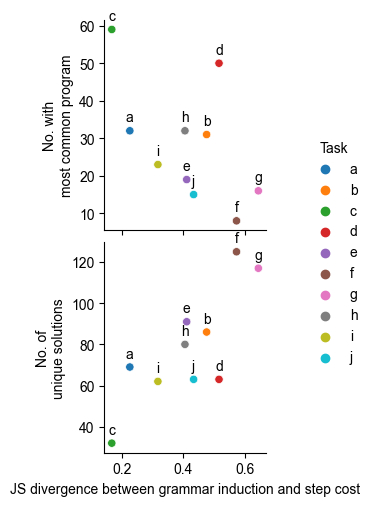

In [20]:
col2names = dict(
    mode='No. with\nmost common program',
    unique_ct='No. of\nunique solutions',
    log_elapsed_seconds='Log response time (seconds)',
    runs='No. of program evaluations',
    mdp_label='Task',
    jsdiv='JS divergence between grammar induction and step cost'
)
task_pairplot(
    x_vars=[col2names[k] for k in ['jsdiv']],
    y_vars=[col2names[k] for k in ['mode', 'unique_ct']],
    hue=col2names['mdp_label'],
    data=df.rename(columns=col2names),
    correlate=True,
    offset_dict={},
)
figs.save('jsdiv_solvar.pdf')

# Is program tweaking related to subroutine count?


$\rho=0.21$, $p < .001$, $N=1668$


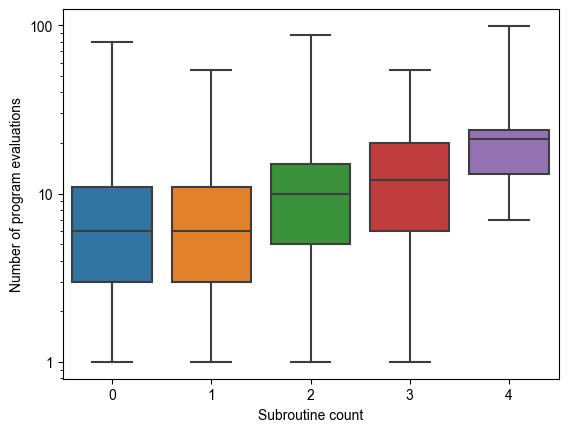

-drop_outliers
$\rho=0.20$, $p < .001$, $N=1649$


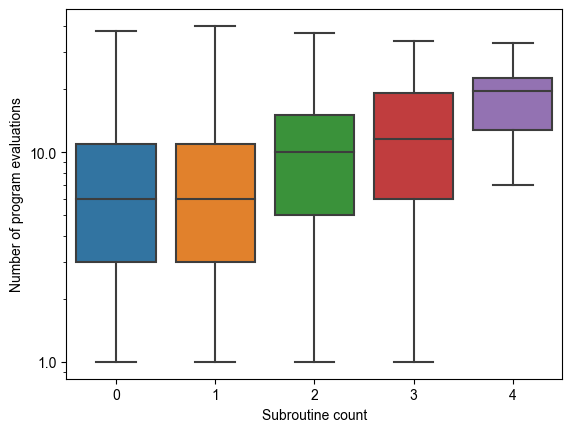

In [21]:
df = []
for participant in D.participants:
    for tr in participant.completed_task_rows():
        df.append(dict(
            pid=participant.worker,
            runs=len(tr.editor_runs()),
            sr_count=lb.exp.subroutine_count(tr.canonical_program),
        ))
df = pd.DataFrame(df)
for name, a_df in [
    ('', df),
    ('-drop_outliers', df[df.runs<=40]),
]:
    print(name)
    res = figs.spearmanr_permutation_test(a_df.runs, a_df.sr_count, n_resamples=10_000)
    figs.report_spearmanr(len(a_df.runs), res)
    sns.boxplot(data=a_df, y='runs', x='sr_count', whis=(0, 100))
    plt.xlabel('Subroutine count')
    plt.ylabel('Number of program evaluations')
    plt.yscale('log')
    import matplotlib.ticker as mpl_ticker
    plt.gca().yaxis.set_major_formatter(mpl_ticker.ScalarFormatter())
    figs.save(f'program-tweaking{name}.pdf')
    plt.show()

# Demographics

In [22]:
import hashlib
# This ID hashing is copied from experiment export code
def hash_id(worker_id): return 'md5:' + hashlib.md5(worker_id.encode()).hexdigest()

demo = pd.read_csv('prolific-demographics.csv')
# Generate PID to match the ones we work with here.
demo['pid'] = [hash_id(f'{pid}:{sid}') for sid, pid in zip(demo['Submission id'], demo['Participant id'])]
# We report for all 193 that completed the task.
demo = demo[demo.pid.isin({p.worker for p in Dcompleted.participants})]
print(demo.shape)
print()

age = demo['Age']
age = age[age != 'DATA_EXPIRED'].astype(int)
print('age mean/sd:')
figs.meansd(age, range=True)
print()

print(demo['Sex'].value_counts())

(193, 22)

age mean/sd:
$M=38.39$ $SD=12.10$, range: 19.00--86.00

Male                 117
Female                72
DATA_EXPIRED           3
Prefer not to say      1
Name: Sex, dtype: int64
